In [6]:
import selenium
from selenium import webdriver
import pandas as pd 
import matplotlib.pyplot as plt
from time import sleep



In [43]:

url = "https://www.imdb.com/list/ls009668579/"
#my_driver = r"C:\Users\afrah\OneDrive\Documents\01 STRIVE\chromedriver.exe" 
driver = webdriver.Chrome(r"C:\Users\afrah\OneDrive\Documents\01 STRIVE\chromedriver.exe")
driver.get(url)
sleep(1)

databasedictionary = {}

ratings =[]
for i in range (1, 101):
    rating = driver.find_element_by_xpath( '//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/div[1]/div[1]/span[2]')
    ratings.append(rating.text)

directors = []
stars = []
for i in range(1, 101):
    dirstars = driver.find_element_by_xpath( '//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/p[3]')
    dirs = dirstars.text.split('|')[0]
    dirs = dirs.split(sep=None, maxsplit=1)[1]
    directors.append(dirs)
    strs = dirstars.text.split('|')[1]
    strs = strs.split(sep=None, maxsplit=1)[1]
    stars.append(strs)

    
metascores = []
metascore = driver.find_elements_by_class_name('metascore')
for meta in metascore:
    metascores.append(meta.text)

gross = []
for i in range (1, 101):
    try:
        bogross = driver.find_element_by_xpath( '//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/p[4]/span[5]')
        bogross = bogross.text.replace('$', '').replace('M','')
        gross.append(bogross.text)
    except:
        gross.append('Unavailable')




databasedictionary = {
    'Directed by': directors,
    'Starring': stars,
    'Box Office Gross in Million Dollars': gross,
    'Metascore from Metacritic': metascore
}   


In [45]:
print(len(ratings))

100


In [78]:
import selenium
from selenium import webdriver
import pandas as pd 
import matplotlib.pyplot as plt
from time import sleep
import requests
import numpy as np

from bs4 import BeautifulSoup as bs

# selenium broswer 
url = "https://www.imdb.com/list/ls009668579/"
#my_driver = r"C:\Users\afrah\OneDrive\Documents\01 STRIVE\chromedriver.exe" 
driver = webdriver.Chrome(r"C:\Users\afrah\OneDrive\Documents\01 STRIVE\chromedriver.exe")
driver.get(url)
sleep(1)

#soup 
page = requests.get(url)

soup = bs(page.content , "html.parser")
url = "https://www.imdb.com/list/ls009668579/"

#list of names and the release dates
m_frame = soup.find("div" , class_ = "lister-list")
m_name = m_frame.findAll("h3", class_="lister-item-header")
m_name_list =[name.text.strip().split("\n") for name in m_name] 
m_name_list_t = np.array(m_name_list).T.tolist()
m_names = m_name_list_t[:][1]
m_r_date = m_name_list_t[:][2]
#m_r_dates stands for movie dates but it is little bit dirty  this is why im going to replace and strip and split
m_r_dates = [i.replace("("," ").replace(")","").replace("I","").strip() for i in m_r_date]

#movie description
m_desc = m_frame.findAll("p",class_ ="" )
m_desc_list = [d.text.strip().split("\n") for d in m_desc]

directors = []
stars = []
for i in range(1, 101):
    dirstars = driver.find_element_by_xpath( '//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/p[3]')
    dirs = dirstars.text.split('|')[0]
    dirs = dirs.split(sep=None, maxsplit=1)[1]
    directors.append(dirs)
    strs = dirstars.text.split('|')[1]
    strs = strs.split(sep=None, maxsplit=1)[1]
    stars.append(strs)

    
metascores = []
metascore = driver.find_elements_by_class_name('metascore')
for meta in metascore:
    metascores.append(meta.text)

#genre
m_genre = m_frame.findAll("span", class_ = "genre")
m_genre_list =[genre.text.strip().split("\n") for genre in m_genre]

#duration
m_duration = m_frame.findAll("span", class_ = "runtime")
m_duration_list = [dur.text.strip() for dur in m_duration]
duration_list = []
for dur in m_duration_list:
    m = dur.split()
    duration_list.append(m[0])

#box office gross
gross = []
for i in range(1,101):
    try:
        bogross = driver.find_element_by_xpath('//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/p[4]/span[5]')
        bg = bogross.text
        bg = bg.replace('$','').replace('M', '')
        gross.append(bg)
    except:
        gross.append('Unavailable')

ratings =[]
for i in range (1, 101):
    rating = driver.find_element_by_xpath( '//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/div[1]/div[1]/span[2]')
    ratings.append(rating.text)

data = {
    'Movie':m_names,
    'Year of release': m_r_dates,
    'Genre': m_genre_list,
    'Directed by': directors,
    'Starring': stars,
    'Synopsis': m_desc_list,
    'Box Office Gross in Million Dollars': gross,
    'Duration in minutes':duration_list,
    'IMDB User Rating': ratings,
    'Metascore from Metacritic': metascore
}   

df = pd.DataFrame(data)



In [73]:
import selenium
from selenium import webdriver
import pandas as pd 
import matplotlib.pyplot as plt
from time import sleep
import requests
import numpy as np
from bs4 import BeautifulSoup as bs

# selenium broswer 
url = "https://www.imdb.com/list/ls009668579/"
#my_driver = r"C:\Users\afrah\OneDrive\Documents\01 STRIVE\chromedriver.exe" 
driver = webdriver.Chrome(r"C:\Users\afrah\OneDrive\Documents\01 STRIVE\chromedriver.exe")
driver.get(url)
sleep(1)

gross = []
for i in range(1,101):
    try:
        bogross = driver.find_element_by_xpath('//*[@id="main"]/div/div[3]/div[3]/div[' + str(i) + ']/div[2]/p[4]/span[5]')
        bg = bogross.text
        bg = bg.replace('$','').replace('M', '')
        gross.append(bg)
    except:
        gross.append('Unavailable')


['534.86', '292.58', '70.10', '187.71', '204.84', '227.47', '448.14', '171.48', '760.51', '132.07', '19.50', '23.64', '66.21', '167.45', '50.87', '154.06', '183.64', '83.01', '183.88', '197.17', '3.31', '4.91', '858.37', '70.51', '322.74', '206.85', '248.16', '38.40', '41.62', '146.28', '85.16', '188.37', '38.41', '0.71', '209.03', '180.98', '112.23', '31.49', '403.71', '145.00', '28.64', '26.95', '623.28', '107.83', '215.41', 'Unavailable', '25.03', '48.07', '111.55', '171.02', '176.24', '678.82', '42.30', '5.02', '232.64', '53.42', '139.31', '100.21', '25.63', '155.25', '304.36', '363.07', '77.91', '180.20', '65.21', '281.49', '66.49', '220.16', '333.18', '0.03', '412.56', '53.71', '350.13', '218.08', '257.73', '46.89', '1.20', '186.85', '0.03', '92.03', '43.04', '63.54', '128.26', '700.06', '155.06', '65.81', '137.69', '186.34', '652.27', '305.41', '59.74', '157.30', '305.41', '26.00', '47.21', '121.25', '134.07', '408.01', '144.80', '90.76']


<BarContainer object of 100 artists>

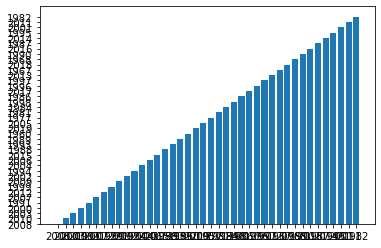

In [81]:
y = df['Year of release']

plt.bar(y, 100)


